# Plotting and Visualization

## 1. A Brief matplotlib API Primer

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### 1.1 Figures and Subplots

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

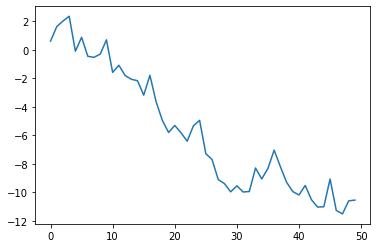

In [4]:
from numpy.random import randn
plt.plot(randn(50).cumsum())

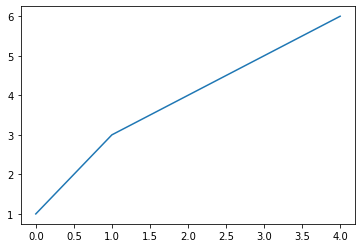

In [5]:
plt.plot([1,3,4,5,6])

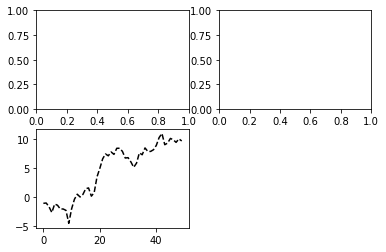

In [6]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)

plt.plot(randn(50).cumsum(), 'k--')


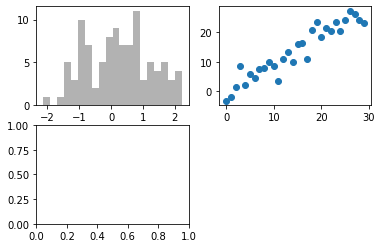

In [7]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)

ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

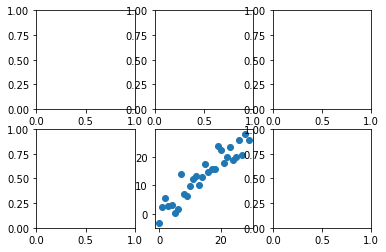

In [8]:
fig, axes = plt.subplots(2, 3)
axes[1][1].scatter(np.arange(30), np.arange(30) + 3*randn(30))

sharex: All subplots should use the same X-axis ticks (adjusting the xlim will affect all subplots)

sharey: All subplots should use the same Y-axis ticks (adjusting the ylim will affect all subplots)


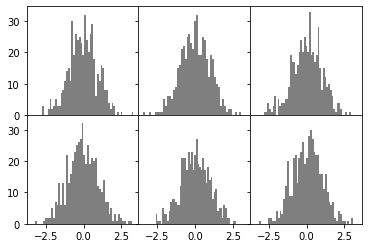

In [9]:
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 1.2 Color, Markers, and Line Styles

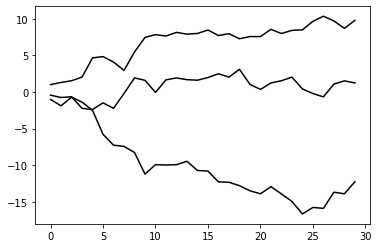

In [10]:
plt.plot(randn(30).cumsum(), 'k')
plt.plot(randn(30).cumsum(), 'k')
plt.plot(randn(30).cumsum(), 'k')

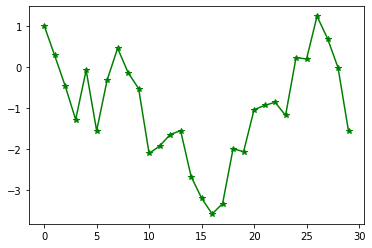

In [11]:
plt.plot(randn(30).cumsum(), 'g*-')

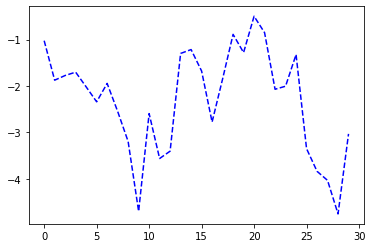

In [12]:
plt.plot(randn(30).cumsum(), linestyle='--', color='blue')

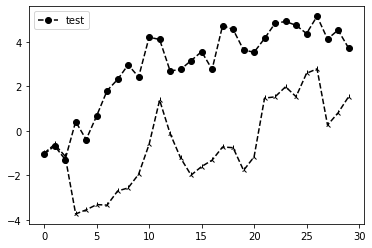

In [13]:
data = randn(30).cumsum()
plt.plot(data, 'ko--', label='test')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='2')
plt.legend(loc='best')

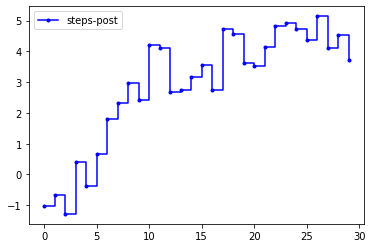

In [14]:
plt.plot(data, 'b.-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

https://matplotlib.org/users/pyplot_tutorial.html

### 1.3 Ticks, Labels, and Legends

In [15]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Stages')

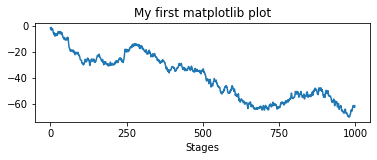

In [16]:
ax = plt.subplot(2, 1, 1)
plt.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
#labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### 1.4 Annotations and Drawing on a Subplot

(-2, 2)

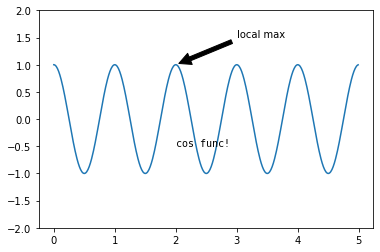

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
ax.text(2, -0.5, 'cos func!', family='monospace', fontsize=10)
ax.set_ylim(-2,2)



https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate

## 2. Plotting Functions in pandas

### 2.1 Line Plots

In [18]:
import numpy as np
from pandas import Series
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.077904
10    0.400629
20    1.566942
30    2.557497
40    2.257742
50    2.648672
60    2.800811
70    0.800915
80    2.454749
90    0.506723
dtype: float64

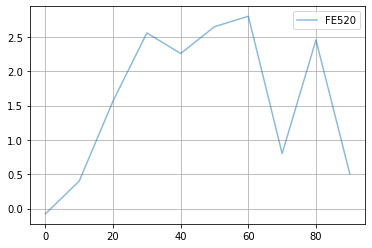

In [19]:
s.plot(label = 'FE520', alpha = 0.5, kind = 'line', grid = 'on')
plt.legend(loc='best')

label: Label for plot legend

ax: matplotlib subplot object to plot on. If nothing passed, uses active matplotlib subplot

style: Style string, like 'ko--', to be passed to matplotlib.

alpha: The plot fill opacity (from 0 to 1)

kind: Can be 'line', 'bar', 'barh', 'kde'

logy: Use logarithmic scaling on the Y axis

use_index: Use the object index for tick labels

rot: Rotation of tick labels (0 through 360)

xticks: Values to use for X axis ticks

yticks: Values to use for Y axis ticks

xlim: X axis limits (e.g. [0, 10])

ylim: Y axis limits

grid: Display axis grid (on by default)

In [20]:
from pandas import DataFrame
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.493791,0.063776,1.490692,0.715444
10,0.050459,1.378620,0.666777,0.239756
20,-0.351592,1.087570,0.188675,-0.957638
30,0.614199,0.390711,-0.284102,-1.577387
40,0.840037,0.844939,-0.023003,-1.039346
50,1.260477,-0.019151,1.019449,-1.016156
60,1.296112,1.017653,2.720700,-0.478324
70,0.081305,2.215873,3.902380,-0.407282
80,0.620475,1.302480,4.130056,0.443725
90,1.494191,1.607249,4.188514,-1.084662


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b057950>,
      dtype=object)

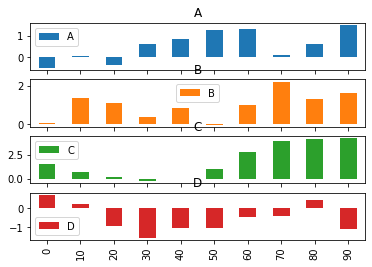

In [21]:
df.plot(subplots = (4,1), kind = 'bar')

subplots: Plot each DataFrame column in a separate subplot
    
sharex: If subplots=True, share the same X axis, linking ticks and limits
    
sharey: If subplots=True, share the same Y axis
    
figsize: Size of figure to create as tuple
    
title: Plot title as string
    
legend: Add a subplot legend (True by default)
    
sort_columns: Plot columns in alphabetical order; by default uses existing column order


### 2.2 Bar Plot

a    0.732743
b    0.628613
c    0.323481
d    0.020154
e    0.445791
f    0.014223
g    0.283761
h    0.601313
i    0.206592
j    0.177158
k    0.757228
l    0.645811
m    0.453326
n    0.307008
o    0.764441
p    0.426176
dtype: float64


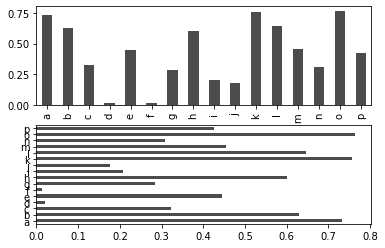

In [22]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
print(data)
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

### 2.3 Histograms and Density Plots

In [23]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 3, size=200)
values = Series(np.concatenate([comp1, comp2]))
values

0      -0.815295
1      -1.083661
2      -0.158010
3       0.222872
4       1.097353
         ...    
395    11.464360
396     9.296403
397    13.194167
398    14.266658
399     7.091265
Length: 400, dtype: float64

/Users/zhiyuanyao/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


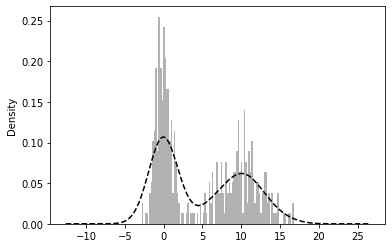

In [24]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')